<a href="https://colab.research.google.com/github/Anuka04/Machine-Learning-aided-Flood-Forecasting/blob/main/Flood_k_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/FINAL FINAL FINAL FINAL DATASET WITH DATES.csv',index_col='Date', parse_dates=True)
dataset.index.freq="MS"
dataset.dropna()
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset

,Rain Assam,Rain,Population,Temp,Flood
Date,,,,,
1926-01-01,23.4,38.1,334011077,17.236,0
1926-02-01,23.2,40.8,334011077,20.375,0
1926-03-01,156.9,179.1,334011077,23.152,0
1926-04-01,140.8,249.7,334011077,25.739,0
1926-05-01,253.9,248.1,334011077,29.002,0
...,...,...,...,...,...
2015-08-01,590.9,590.9,1322866505,17.160,1
2015-09-01,279.9,279.9,1322866505,20.243,1
2015-10-01,62.6,62.6,1322866505,24.575,1


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[4.61000000e+01 8.60000000e+01 8.52012672e+08 2.09450000e+01]
 [1.62000000e+01 1.30400000e+02 6.66267776e+08 2.02500000e+01]
 [3.95800000e+02 3.95800000e+02 1.27448717e+09 2.72090000e+01]
 ...
 [5.43300000e+02 8.07000000e+02 9.83281216e+08 2.67120000e+01]
 [2.71000000e+02 1.85200000e+02 5.96107456e+08 2.65320000e+01]
 [1.64000000e+01 1.93000000e+01 7.62895168e+08 1.67580000e+01]]


In [ ]:
print(y_train)

[0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0
 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0
 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1
 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0
 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 1 1 1 1 

In [ ]:
print(X_test)

[[2.66400000e+02 2.98700000e+02 1.09831309e+09 3.03740000e+01]
 [1.30000000e+01 6.97000000e+01 1.13626458e+09 2.15730000e+01]
 [4.49100000e+02 3.87600000e+02 7.62895168e+08 2.62380000e+01]
 ...
 [8.20000000e+00 1.36100000e+02 6.81248384e+08 1.90770000e+01]
 [4.63000000e+01 7.99000000e+01 9.26351296e+08 1.89750000e+01]
 [4.04200000e+02 4.84200000e+02 8.15716160e+08 2.93230000e+01]]


In [ ]:
print(y_test)

[0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0
 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1
 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0
 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0
 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1
 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0
 1 1 0 1 0 0 1 0 0 0 1]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-0.83973315 -0.69159793  0.55781985 -0.75198772]
 [-0.99515016 -0.52316692 -0.02678263 -0.91381039]
 [ 0.97797016  0.48362563  1.88749103  0.7065118 ]
 ...
 [ 1.74465944  2.0435092   0.97096668  0.59079113]
 [ 0.32927307 -0.31528361 -0.24760106  0.54888023]
 [-0.99411059 -0.94462379  0.2773367  -1.72688196]]


In [ ]:
print(X_test)

[[ 0.30536276  0.11527764  1.33301117  1.44344523]
 [-1.01178342 -0.75343184  1.45245744 -0.60576523]
 [ 1.25501788  0.45251901  0.2773367   0.48042575]
 ...
 [-1.03673331 -0.50154402  0.02036645 -1.18692979]
 [-0.83869357 -0.71473823  0.79178883 -1.2106793 ]
 [ 1.02163247  0.81897025  0.44358236  1.19873211]]


## Training the K-NN model on the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[135  12]
 [ 23 100]]


0.8703703703703703

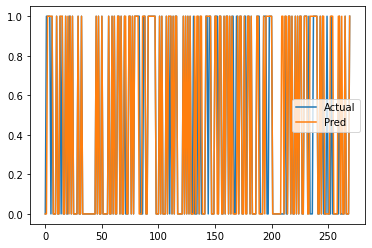

In [ ]:
import matplotlib.pyplot as plt
F = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
plt.plot(F[:,0], label="Actual")
plt.plot(F[:,1], label="Pred")
plt.legend()
plt.show()

Manhattan Distance metric

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'manhattan', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[136  11]
 [ 27  96]]


0.8592592592592593

Euclidian Distance Metric

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'euclidean', p = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2, p=1)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[135  12]
 [ 23 100]]


0.8703703703703703